<a href="https://colab.research.google.com/github/b12halflife/capstone_Project_ml/blob/main/MODELING_CNN_TRASH_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOWNLOAD DATASET

In [1]:
!gdown 1SQe0PcWxwv0EkGn2SKaw9DWp_816RQGJ

Downloading...
From: https://drive.google.com/uc?id=1SQe0PcWxwv0EkGn2SKaw9DWp_816RQGJ
To: /content/dataset_6classtrash.zip
100% 42.7M/42.7M [00:01<00:00, 37.1MB/s]


# EKSTRAK FROM ZIP FILE

In [2]:
!unzip dataset_6classtrash.zip -d data

Archive:  dataset_6classtrash.zip
   creating: data/dataset_6classtrash/cardboard/
  inflating: data/dataset_6classtrash/cardboard/cardboard1.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard10.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard100.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard101.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard102.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard103.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard104.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard105.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard106.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard107.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard108.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard109.jpg  
  inflating: data/dataset_6classtrash/cardboard/cardboard11.jpg  
  inflating: data/dataset_6classtrash/cardboard/ca

# LABELING DATA

In [3]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data/dataset_6classtrash')

Found 2527 files belonging to 6 classes.


In [4]:
# Get the class names
class_names = data.class_names

# Print the class names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
batch[0].shape

(32, 256, 256, 3)

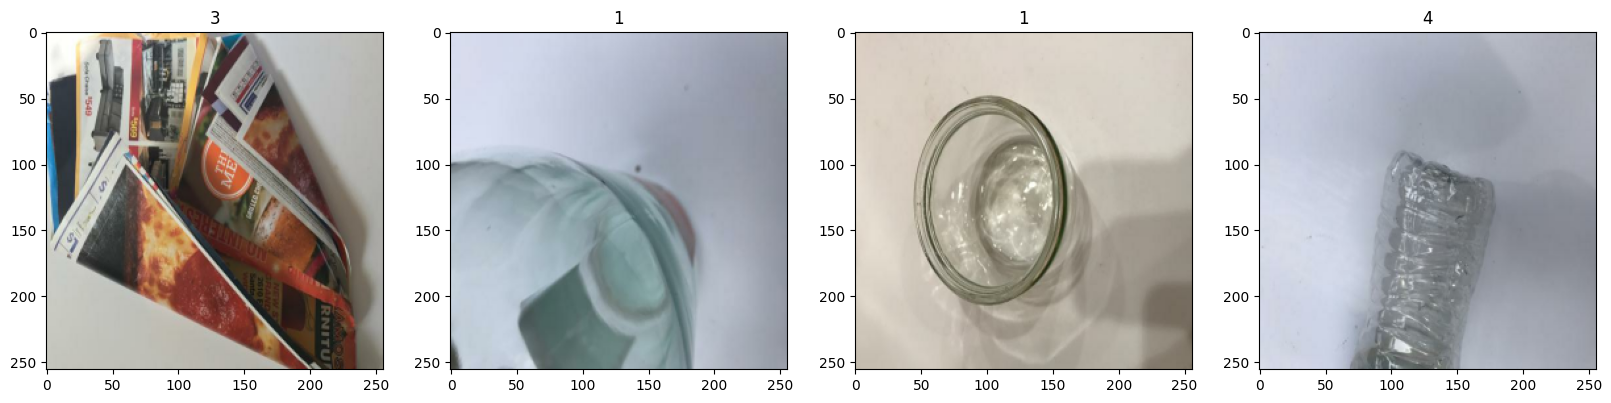

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))

# SCALED DATA 0-1

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.94460785, 0.9916667 , 0.9916667 ],
          [0.94411767, 0.9911765 , 0.9911765 ],
          [0.94264704, 0.98970586, 0.98970586],
          ...,
          [0.7857843 , 0.77892154, 0.752451  ],
          [0.7470588 , 0.7495098 , 0.8039216 ],
          [0.71960783, 0.7387255 , 0.7823529 ]],
 
         [[0.94166666, 0.9887255 , 0.9887255 ],
          [0.9382353 , 0.9852941 , 0.9852941 ],
          [0.9411765 , 0.9882353 , 0.9882353 ],
          ...,
          [0.7490196 , 0.7230392 , 0.6362745 ],
          [0.7867647 , 0.7745098 , 0.76862746],
          [0.7534314 , 0.7490196 , 0.7941176 ]],
 
         [[0.9387255 , 0.9857843 , 0.9857843 ],
          [0.9338235 , 0.98088235, 0.98088235],
          [0.94166666, 0.9887255 , 0.9887255 ],
          ...,
          [0.70490193, 0.65392154, 0.502451  ],
          [0.76862746, 0.7318627 , 0.65882355],
          [0.76960784, 0.7352941 , 0.78333336]],
 
         ...,
 
         [[0.81960785, 0.85882354, 0.89411765],
          [0.81960

# SPLIT DATA TRAIN VAL TEST

In [11]:
len(data)

79

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [13]:
train_size+val_size+test_size

79

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# MODELLING WITH CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# CUSTOM CALLBACKS IF REACH ACCURACY 98

In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class AccuracyStopCallback(Callback):
    def __init__(self, target_accuracy=0.98):
        super(AccuracyStopCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            self.model.stop_training = True

# Create an instance of the AccuracyStopCallback
accuracy_stop_callback = AccuracyStopCallback(target_accuracy=0.98)

# TRAINING

In [22]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[accuracy_stop_callback])

Epoch 1/5
55/55 [==============================] - 143s 3s/step - loss: 1.5674 - accuracy: 0.3545 - val_loss: 1.3789 - val_accuracy: 0.4531
Epoch 2/5
55/55 [==============================] - 126s 2s/step - loss: 1.2787 - accuracy: 0.5040 - val_loss: 1.3032 - val_accuracy: 0.4766
Epoch 3/5
55/55 [==============================] - 118s 2s/step - loss: 1.0874 - accuracy: 0.5801 - val_loss: 1.1750 - val_accuracy: 0.5293
Epoch 4/5
55/55 [==============================] - 127s 2s/step - loss: 0.9086 - accuracy: 0.6636 - val_loss: 1.1805 - val_accuracy: 0.6172
Epoch 5/5
55/55 [==============================] - 127s 2s/step - loss: 0.7255 - accuracy: 0.7551 - val_loss: 1.1502 - val_accuracy: 0.6074


# PLOT ACCURACY AND LOSS

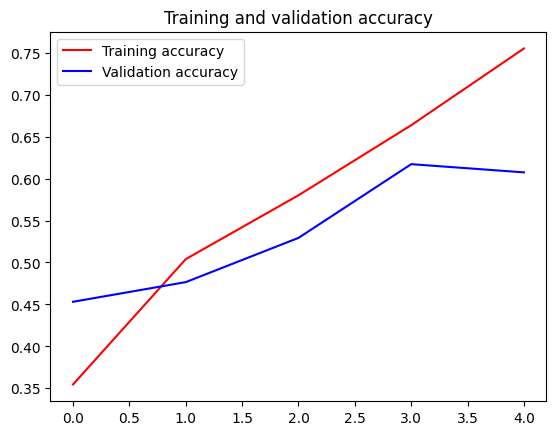

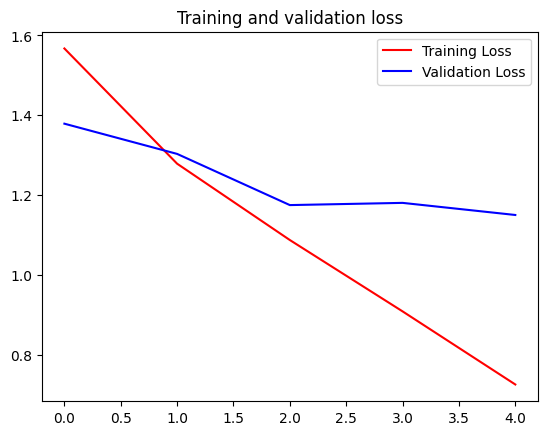

In [23]:
# Plot the chart for accuracy and loss on both training and validation
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# TEST THE MODEL WITH INPUT IMAGE

In [24]:
import cv2
import matplotlib 

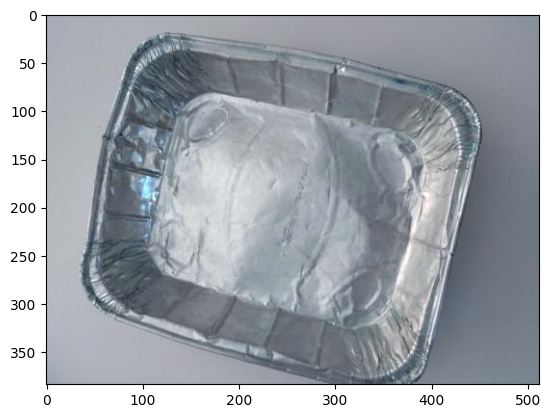

In [25]:
img = cv2.imread('data/dataset_6classtrash/metal/metal5.jpg')
plt.imshow(img)
plt.show()

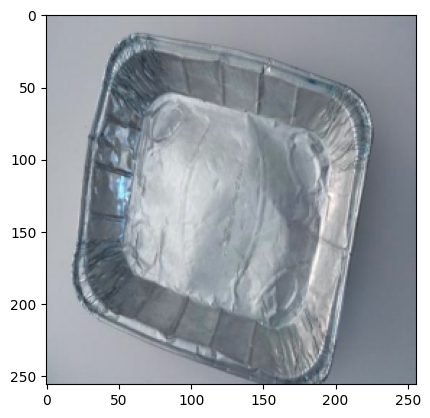

In [26]:
import numpy as np
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [27]:
import numpy as np

# Assuming `resize` is the image you want to predict
# Assuming `class_names` is the list of class names

# Preprocess the image
resized_image = resize / 255.0
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

1/1 [==============================] - 0s 194ms/step
Predicted class: paper
Class probabilities: [0.01246995 0.2525372  0.23041941 0.34807563 0.15559761 0.00090015]


# SAVE THE MODEL TO H5 AND TFLITE

In [28]:
from tensorflow.keras.models import load_model
import os

In [29]:
model.save(os.path.join('saved_model','imageclassifier.h5'))

In [30]:
export_dir = 'saved_model'

tf.saved_model.save(model,export_dir=export_dir)

In [31]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [32]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert();

In [33]:
import tensorflow as tf

# Assuming `tflite_model` is the generated TFLite model
saved_folder = 'saved_model'
tflite_model_path = f'{saved_folder}/model.tflite'

# Write the TFLite model to a file
tf.io.write_file(tflite_model_path, tflite_model)

print("TFLite model saved successfully.")


TFLite model saved successfully.


buat json file

In [40]:
import json
import pickle

# Assuming you have a trained model object called 'model'
model = model  # Your trained model object

# Serialize the model
serialized_model = pickle.dumps(model)

# Convert the serialized model to a string
model_string = serialized_model.decode('latin1')

# Write the serialized model to a JSON file
with open('model.json', 'w') as json_file:
    json.dump(model_string, json_file)


load the serialized model from the JSON file in JavaScript.

In [ ]:
const fs = require('fs');

// Read the serialized model from the JSON file
const serializedModel = fs.readFileSync('model.json', 'utf8');

// Parse the serialized model as JSON
const modelString = JSON.parse(serializedModel);

// Use the modelString as needed in your JavaScript code
// ...
